<a href="https://colab.research.google.com/github/lucyvost/dtc_docking/blob/main/DTC_smolecules_day_2_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Assessing generated molecule quality

First we're going to look at pocket-conditioned *de novo* compound generation with DiffSBDD.

[**[Paper]**](https://arxiv.org/abs/2210.13695)
[**[Code]**](https://github.com/arneschneuing/DiffSBDD)


<img src="https://raw.githubusercontent.com/arneschneuing/DiffSBDD/main/img/overview.png" height=250>

Have a quick look through the paper, and think about...


*   What is inpainting? What scenarios might that approach be useful in?
*   What dataset do they use to train their model -- importantly, is it a dataset of *only* 3D molecule structures, a dataset of bound structures, or both?
*   How do the authors compare the molecules generated by their model to those generated by others? Does it seem like an exhaustive comparison, or does anything else come to mind that should be checked?



Think about the factors they compare in two categories: molecule-specific (could be something like average number of atoms) and binding-specific (eg docking score). In the first part of this workshop, we will concentrate on the former of these!

Thanks to some dependency issues (💀) molecules have already been generated for you using the default *de novo* setup (check their Github if you want to learn more about this). Upload one of these to colab from the workshop repo - you can learn more about the different targets at https://www.rcsb.org/ (or just pick one)

We'll now get set up to do some analysis on them:

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
#Install dependencies
%cd /content
!apt install openbabel
!pip install rdkit

import os
from rdkit import Chem, RDConfig
from rdkit.Chem import ChemicalFeatures


/content
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openbabel is already the newest version (3.1.1+dfsg-6ubuntu5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# RDKit validity

Now, we'll actually assess the quality of the generated molecules. One of the most common ways to do this is using RDkit, which you used a bit in a previous module. See below an example of how you can do this with a molecule made up from a smiles string:

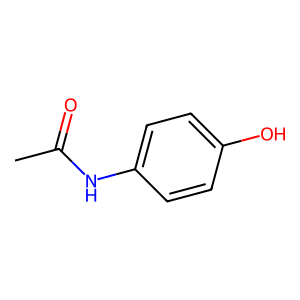

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
example_smiles = Chem.MolFromSmiles('CC(=O)NC1=CC=C(O)C=C1')
Chem.Draw.MolToImage(example_smiles)

...you just got paracetamol'd! rdkit was able to parse the molecule we gave it, so running 'example_smiles' showed us the molecule we asked for. If we supply it with an invalid smiles, though, it would return nothing:

In [ ]:
example_smiles = Chem.MolFromSmiles('C=C(=O)C1CCC(O)CC1')
example_smiles == None

[08:24:55] Explicit valence for atom # 1 C, 5, is greater than permitted


True

Now try and do the same with the molecules generated with diffusion, and calculate the percentage of molecules that are parsable with rdkit.

- What does the % validity look like? is it what you'd have expected by reading the paper?

- Looking at rdkit documentation, what kind of factors do you think might be preventing some molecules from being valid?

Hints:
 - You can load the sdf file you've generated with `supplier = Chem.SDMolSupplier(path)` - they don't need to be put into smiles format!
 - Iterate through this list, and for every molecule, check whether it is valid according to rdkit

In [ ]:
#how valid are the generated molecules?




Now that you know which molecules rdkit considers valid, view the molecules that are rdkit-approved. Hint: Chem.Draw.MolsToGridImage is helpful to view a big list of molecules.

In [ ]:
#view the valid molecules



Whilst you're viewing things, you can also have a quick look at the native ligand of your target of interest. You can do this by finding its smiles string on the PDB listing, and showing it as we did earlier with the paracetamol. How much do the generated molecules look like it?

In [ ]:
#view native ligand



# Posebusters

There also exist packages that do a slightly more thorough check for molecule plausibility, for example posebusters (documentation [here](https://posebusters.readthedocs.io/en/latest/)).

In [4]:
! pip install posebusters --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.7/552.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.2/751.2 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 27.2 MB/s eta 0:00:00


Using the documentation, generate a table of the posebusters checks on our generated molecules. Can you see:
- which of the tests the molecules fail the most?
- any tests that molecules tend to perform well at?

In [ ]:
from posebusters import PoseBusters
import pandas as pd
buster = PoseBusters(config="mol")

In [ ]:
#what do the molecules pass/fail?


# Lipinksi rule of 5

Finally, one of the most popular rules that med chemists use when designing drugs is the Lipinski rule of five. Whilst our earlier checks have concerned the chemical feasibility of our molecules, this is a set of guidelines used to predict if a chemical compound is likely to be an orally active drug in humans. Specifically, it consists of checking:

- Hydrogen bond donors (no more than 5)
- Hydrogen bond acceptors (no more than 10)
- Molecular weight (less than 500 Da)
- Partition coefficient (not greater than 5)

Calculate an estimate of the number of molecules generated that pass Lipinski's rule, again, seeing which of the checks catches the most generated molecules out.
Hint: the `rdkit.Chem.Lipinski` module might be helpful.

# Molecule diversity/ similarity

Another popular method used to assess molecules is similarity - both internally (ensuring the model isn't producing the same molecule again and again) and to the native ligand. Try to calculate:


*   How similar the molecules are to each other - in the paper, the authors refer to this as molecular diversity
*   How similar each molecule is to the native ligand - you can do this in 2D as above (using Tanimoto similarity) or in 3D using shape and colour score, a metric favoured by OPIG (https://www.blopig.com/blog/2021/11/using-normalized-sucos-scores/)



In [ ]:
#how similar are the molecules to each other?



In [ ]:
#how about to the native ligand (comparing by Tanimoto similarity)?
#a neat idea would be to show the molecules with the Draw.MolsToGridImage, and for each molecule, label it with its similarity to the native ligand
#see an example of labelling molecules here https://www.blopig.com/blog/2022/06/viewing-fragment-elaborations-in-rdkit/




Now do the same, but instead considering 3D similarity. Hint: you can get the 3D structure of the native ligand as follows

In [ ]:
!wget http://files.rcsb.org/download/XXXX.pdb
!grep ATOM XXXX.pdb > rec.pdb
!grep HETATM XXXX.pdb > lig.pdb

In [ ]:
#calculate overlap with native ligand
#display as before



We've now looked at a lot of the molecule-specific criteria. In the next notebook, we'll focus on assessing our generated molecules according to how they bind to our protein of interest!

# Bonus - interactions with protein

In case you literally cannOT wait to get your mitts on some binding information, here's a quick primer for what we'll be looking at in the second part of this workshop.

For pymol users: open the generated molecules in pymol - by eye, try and see how similar are the generated molecules to the crystal structure of the ligand: do they overlap in volume? do they maintain any of the interactions of the crystal ligand structure?

Hints:
- You can get the crystal structure straight into pymol just by running `fetch {pdbid}` in the pymol command line
- You can then view hydrogen bonds within the solved structure by going Action > Find > Polar contacts > Within Selection

Alternatively, you can do this using RDKit, but this is a bit trickier and will be covered in pt2!